In [ ]:
def flip(y_data, n_classes, flip_perc, circular_flip = True):
    Y = copy.deepcopy(y_data)
    n, p, size = n_classes-1, flip_perc, Y.shape[0] 
    flip_vector = np.random.binomial(n, p, size)

    if circular_flip:
        Y[flip_vector==1] +=1
        Y[flip_vector==1] = Y[flip_vector==1]%n_classes
    else:
        new_Classes = np.random.randint(low=0, high= (n_classes-1), size=sum(flip_vector))
        new_Classes[Y[flip_vector==1]==new_Classes] =n_classes-1
        Y[flip_vector==1]=new_Classes
    return Y

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


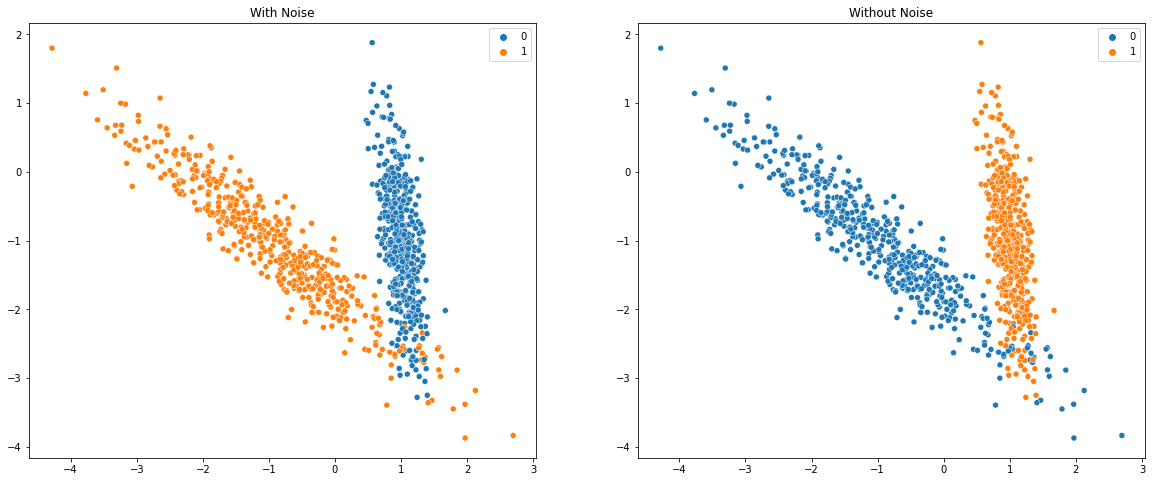

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import copy
import numpy as np
# Generate noisy data
X,y = make_classification(n_samples=1000, n_features=2, n_informative=2,n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,class_sep=1,flip_y=0,weights=[0.5,0.5], random_state=17)
f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
y_train = flip(y,2,flip_perc=1,circular_flip=False)
sns.scatterplot(X[:,0],X[:,1],hue=y_train,ax=ax1);
ax1.set_title("With Noise");
# Generate clean data
X,y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,class_sep=1,flip_y=0,weights=[0.5,0.5], random_state=17)
#_,x_test,_,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax2);
ax2.set_title("Without Noise");
plt.show();